In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit import QuantumRegister,ClassicalRegister
from qiskit_machine_learning.neural_networks import EstimatorQNN,SamplerQNN
from IPython.display import clear_output
import matplotlib.pyplot as plt
import qiskit.quantum_info as qi
from qiskit.circuit import ParameterVector
from qiskit_algorithms.utils import algorithm_globals
import time 
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import EfficientSU2,RealAmplitudes
import numpy as np

import pickle 
import time
from qiskit.circuit.library import iSwapGate
from math import comb

from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator
from qiskit.circuit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator
sqrt_iSWAP = iSwapGate().power(1/2)

from matplotlib import colormaps
list(colormaps)
cmap = 'gist_heat'

In [2]:
from Z2_2flavourClass import Z2_2flavour

In [413]:
matter_defect = [7,15]
#matter_defect = [4,12]
nLinks = 5

# matter_defect = [7,12]
# nLinks = 7

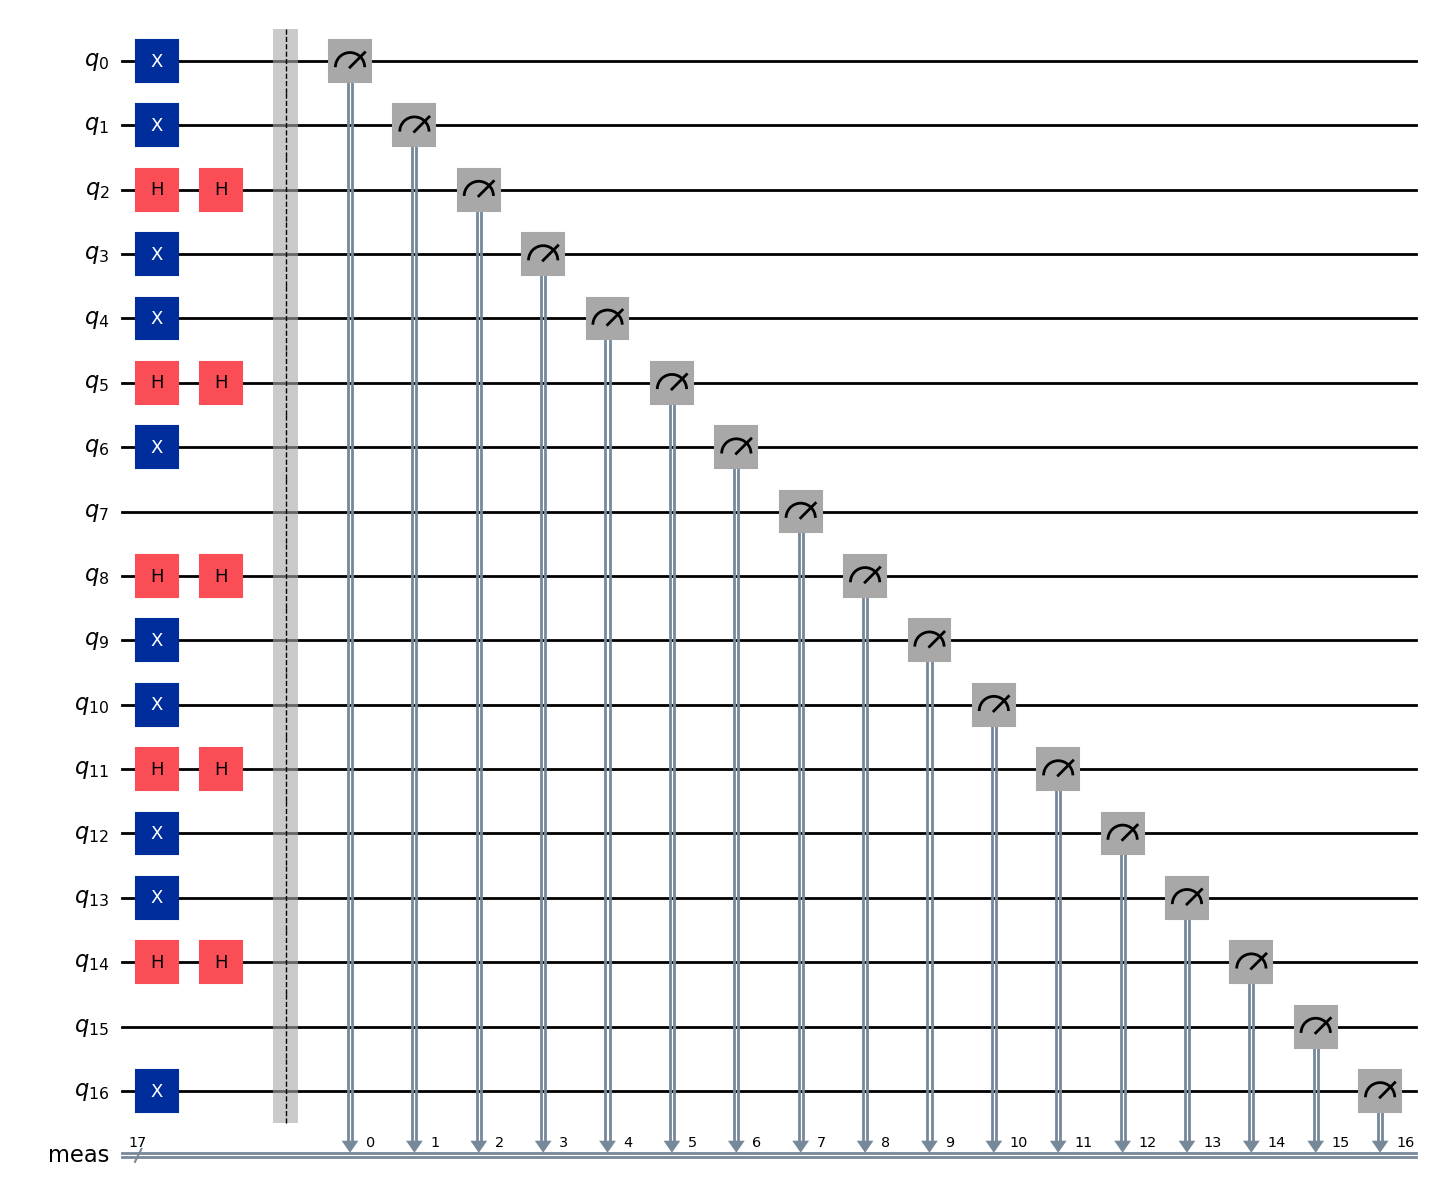

In [414]:
z2 = Z2_2flavour(nLinks = nLinks,matter_defect = matter_defect)
z2.getTrotterCircuit(1,nTrotter=0,fFactor=0.2,dtFactor=0.2,measure=True,rescale=False)
circuit = z2.circuit
circuit.draw('mpl')

In [415]:
aer = AerSimulator()
estimator_sim = Estimator( mode = aer)
sampler_sim = Sampler(mode = aer)
pm_sim = generate_preset_pass_manager(backend=aer, optimization_level=3)

In [416]:
nShots = None

In [417]:
isa_qc = pm_sim.run(circuit)
job = sampler_sim.run([(isa_qc,[])],shots = nShots)
result = job.result()

In [418]:
string = result[0].data.meas.get_counts()

In [419]:
def num(n):
    n = int(n)
    if n == 0:
        n = 1
    elif n == 1:
        n = -1
    return n
        
    
def checkGauge(s):
    nLinks = int((len(s)-2)/3)
    gauge_list = []
    for i in range(1, nLinks, 1):
        index = i * 3 - 1
        link_num = num(s[index])
        gauge = num(s[index]) * num(s[index+1]) * num(s[index+2]) * num(s[index+3])
        gauge_list.append(gauge)
     
    return np.array(gauge_list)

def checkCharge(s):
    nLinks = int((len(s)-2)/3)
    c1 = 0
    c2 = 0
    gauge_list = []
    for i in range(1, nLinks+1, 1):
        
        index = i * 3 - 1
        #print(index)
        #print(s[index - 2],s[index - 1])
        c1 += num(s[index - 2])
        c2 += num(s[index - 1])

    c1 += num(s[-2])
    c2 += num(s[-1])
    #print(s[-2],s[-1])
    return c1,c2
        
        
        
    
    

In [420]:
#Gauge and charge are always conserved.

for s in string:
    print(s,checkGauge(s),string[s],checkCharge(s))

10011011001011011 [ 1  1 -1  1] 1024 (-4, -4)


In [405]:
dtFactor = 0.2
Trotter_time = np.arange(dtFactor,10*dtFactor,dtFactor)
nTrotter_total = Trotter_time.shape[0]
dt_min = 0.4
nTrotter_list = np.ceil(Trotter_time/dt_min)
dt_list = Trotter_time/nTrotter_list

#Adding zero time
Trotter_time = np.concatenate([np.array([0]),Trotter_time])
nTrotter_list = np.concatenate([np.array([0]),nTrotter_list])
dt_list = np.concatenate([np.array([dt_min]),dt_list])

In [406]:
Trotter_time

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8])

In [407]:

n_jobs = nTrotter_list*5
print(sum(n_jobs))
sim_result = []


    
for i in range(len(nTrotter_list)):
    nTrotter = int(nTrotter_list[i])  
    dt = dt_list[i]
    
    z2 = Z2_2flavour(nLinks = nLinks,matter_defect = matter_defect)
    z2.getTrotterCircuit(1,nTrotter=nTrotter,fFactor=0.2,dtFactor=dt,measure=True,rescale=False)
    circuit = z2.circuit
    print("current trotter size = ", nTrotter," dt = ", dt, 't_total = ', dt*nTrotter," matter_defect = ",matter_defect)

    isa_qc = pm_sim.run(circuit)
    job = sampler_sim.run([(isa_qc,[])],shots = nShots)
    result = job.result()[0].data.meas.get_counts()
    sim_result.append(result)
            


125.0
current trotter size =  0  dt =  0.4 t_total =  0.0  matter_defect =  [7, 9]
current trotter size =  1  dt =  0.2 t_total =  0.2  matter_defect =  [7, 9]
current trotter size =  1  dt =  0.4 t_total =  0.4  matter_defect =  [7, 9]
current trotter size =  2  dt =  0.30000000000000004 t_total =  0.6000000000000001  matter_defect =  [7, 9]
current trotter size =  2  dt =  0.4 t_total =  0.8  matter_defect =  [7, 9]
current trotter size =  3  dt =  0.3333333333333333 t_total =  1.0  matter_defect =  [7, 9]
current trotter size =  3  dt =  0.39999999999999997 t_total =  1.2  matter_defect =  [7, 9]
current trotter size =  4  dt =  0.35000000000000003 t_total =  1.4000000000000001  matter_defect =  [7, 9]
current trotter size =  4  dt =  0.4 t_total =  1.6  matter_defect =  [7, 9]
current trotter size =  5  dt =  0.36 t_total =  1.7999999999999998  matter_defect =  [7, 9]


In [408]:
# Gauge is protected at all times
for r in sim_result:
    for s in r:
        print(s,checkGauge(s),checkCharge(s),r[s])

11011010001011011 [ 1 -1 -1  1] (-4, -4) 1024
11011010001011011 [ 1 -1 -1  1] (-4, -4) 870
11011011100011011 [ 1 -1 -1  1] (-4, -4) 34
11011010011101011 [ 1 -1 -1  1] (-4, -4) 36
11010111001011011 [ 1 -1 -1  1] (-4, -4) 34
11011000111011011 [ 1 -1 -1  1] (-4, -4) 41
11001110111011011 [ 1 -1 -1  1] (-4, -4) 2
11011011110101011 [ 1 -1 -1  1] (-4, -4) 3
11010101111011011 [ 1 -1 -1  1] (-4, -4) 1
11011001010011011 [ 1 -1 -1  1] (-4, -4) 1
11011011101110011 [ 1 -1 -1  1] (-4, -4) 1
11000011111011011 [ 1 -1 -1  1] (-4, -4) 1
11011010011101011 [ 1 -1 -1  1] (-4, -4) 86
11011010001011011 [ 1 -1 -1  1] (-4, -4) 511
11011011101110011 [ 1 -1 -1  1] (-4, -4) 23
11010111001011011 [ 1 -1 -1  1] (-4, -4) 87
11001111011110011 [ 1 -1 -1  1] (-4, -4) 1
11011000111011011 [ 1 -1 -1  1] (-4, -4) 110
11010101111011011 [ 1 -1 -1  1] (-4, -4) 21
11011011100011011 [ 1 -1 -1  1] (-4, -4) 99
11011011110101011 [ 1 -1 -1  1] (-4, -4) 15
11001110111011011 [ 1 -1 -1  1] (-4, -4) 20
11011001010011011 [ 1 -1 -1  1] (-

In [409]:
def getMeasurements(s):
    tmpKey = np.array([int(numeric_string) for numeric_string in s])  
    arr = 1 -2*tmpKey
    
    for i in range(arr.shape[0]): #introduce a negative sign for all the matter site
        if (i+1)%3 !=0:
            arr[i] = -arr[i]
            
    return (arr+1)/2

In [410]:
# Gauge is protected at all times
sim_evs = []
for r in sim_result:

    tmp_evs = np.zeros_like(np.array([int(numeric_string) for numeric_string in list(r.keys())[0]]).astype(float)) # array with right length
    counts = 0
    for s in r:
        output = getMeasurements(s)

        tmp_evs += output*r[s]
        counts += r[s]
    tmp_evs = tmp_evs/counts
    sim_evs.append(tmp_evs)
sim_evs = np.array(sim_evs)

<Figure size 640x480 with 0 Axes>

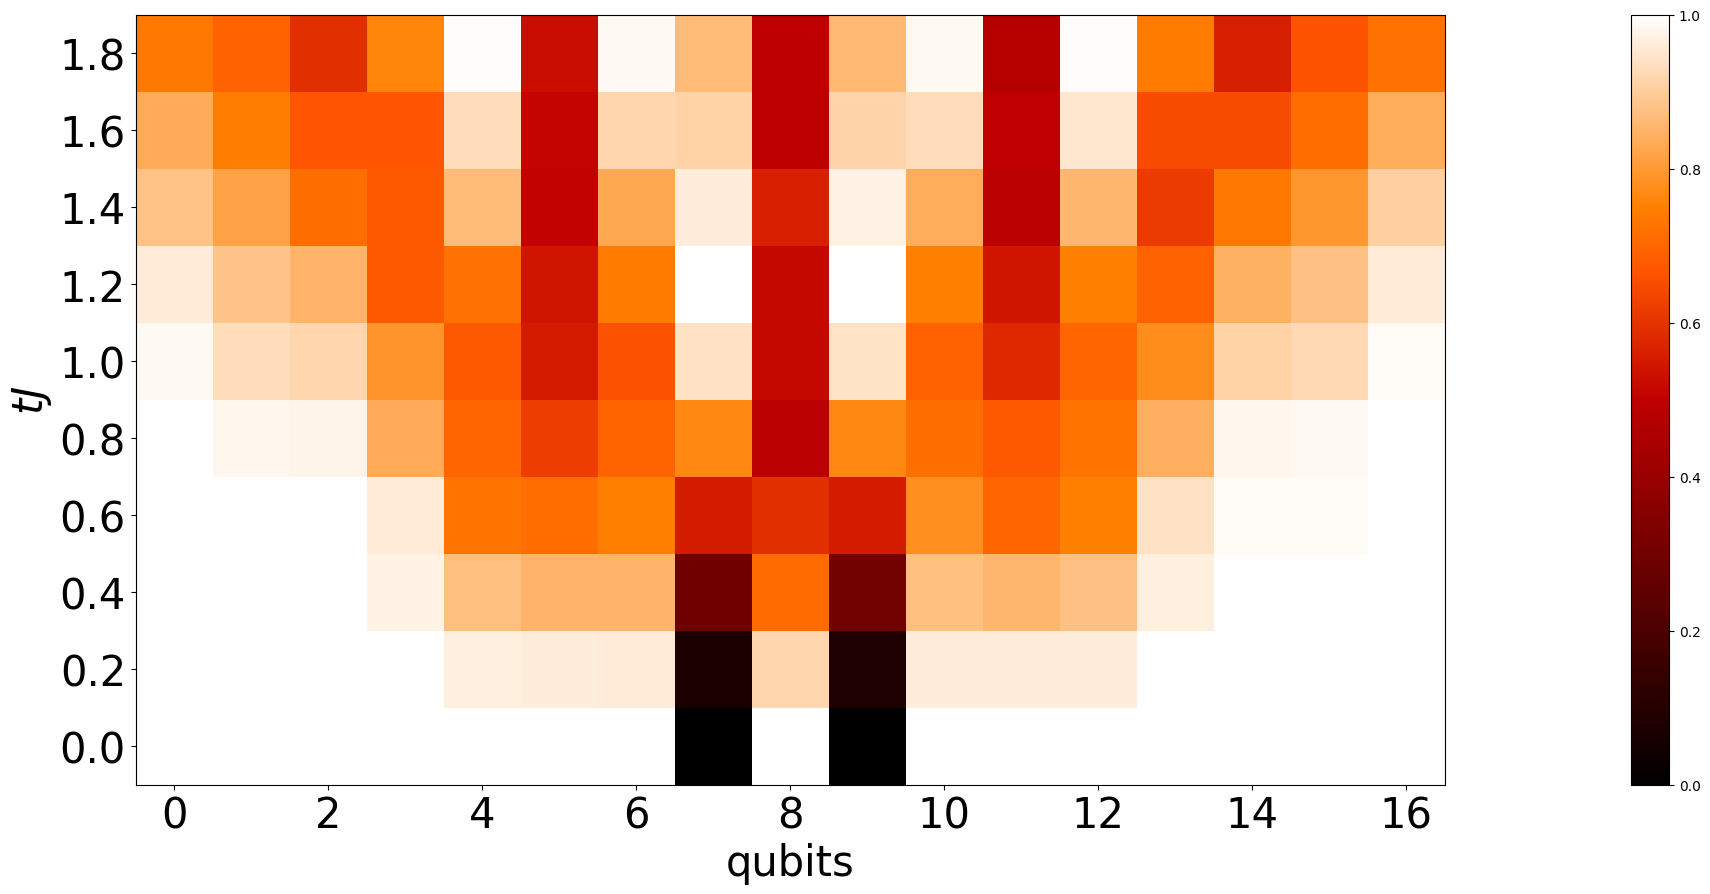

In [411]:

LabelSize=30
plt.figure(1)
plt.figure(figsize=(30,10))
plt.imshow(sim_evs, interpolation='none',origin='lower',cmap = cmap)

y=Trotter_time *1
plt.yticks(range(len(y)), np.round(y,2))
plt.xlabel('qubits',fontsize=LabelSize)
plt.ylabel(r'$tJ$',fontsize=LabelSize)
plt.tick_params(axis='both', which='major', labelsize=LabelSize)
plt.colorbar(fraction=0.03, pad=0.08)
#plt.savefig(name+".png", dpi=100,bbox_inches='tight')


In [421]:
sim_evs

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.        , 1.        , 0.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ],
       [1.        , 1.        , 1.        , 0.99707031, 0.96484375,
        0.96386719, 0.95800781, 0.07324219, 0.91894531, 0.08300781,
        0.96289062, 0.9609375 , 0.96191406, 0.99902344, 1.        ,
        1.        , 1.        ],
       [1.        , 1.        , 1.        , 0.97558594, 0.87304688,
        0.85449219, 0.85253906, 0.29003906, 0.70800781, 0.296875  ,
        0.87109375, 0.85644531, 0.875     , 0.96582031, 1.        ,
        1.        , 1.        ],
       [1.        , 0.99902344, 0.99902344, 0.95703125, 0.72949219,
        0.7109375 , 0.74902344, 0.55175781, 0.58984375, 0.55273438,
        0.78027344, 0.70214844, 0.75097656, 0.93945312, 0.99023438,
        0.99023438, 1.        ],
       [0.99609375, 0.98046875, 0.9765625 , 0.832031

In [412]:
def combineCharge(evs):
    out = []
    Sum = 0
    for i in range(len(evs)):
        tmp = evs[i]
        if (i+1)%3 == 1:
            Sum+= tmp
        elif (i+1)%3 == 2:
            Sum+= tmp
            out.append(Sum)
            print(i,Sum,tmp)
            Sum = 0
        else:
            out.append(tmp)
            
    return np.array(out)

In [396]:
sim_evs_combined = []
for evs in sim_evs:
    sim_evs_combined.append(combineCharge(evs))
sim_evs_combined = np.array(sim_evs_combined)

1 2.0 1.0
4 1.0 0.0
7 2.0 1.0
10 2.0 1.0
13 1.0 1.0
16 2.0 1.0
1 1.9677734375 0.9677734375
4 1.0712890625 0.0712890625
7 1.9609375 0.9609375
10 1.9619140625 1.0
13 1.0791015625 1.0
16 1.958984375 1.0
1 1.85546875 0.85546875
4 1.2607421875 0.2607421875
7 1.8837890625 0.8837890625
10 1.876953125 1.0
13 1.2685546875 1.0
16 1.8544921875 1.0
1 1.681640625 0.681640625
4 1.560546875 0.560546875
7 1.7568359375 0.765625
10 1.7421875 0.9931640625
13 1.525390625 0.9990234375
16 1.7333984375 1.0
1 1.5322265625 0.5322265625
4 1.7822265625 0.7841796875
7 1.68359375 0.7021484375
10 1.68359375 0.98828125
13 1.8115234375 0.9931640625
16 1.5068359375 1.0
1 1.3828125 0.3828125
4 1.9365234375 0.9541015625
7 1.6630859375 0.71484375
10 1.646484375 0.95703125
13 1.9384765625 0.9912109375
16 1.4326171875 1.0
1 1.3544921875 0.35546875
4 1.9560546875 0.9931640625
7 1.6826171875 0.7626953125
10 1.693359375 0.91796875
13 1.9658203125 0.970703125
16 1.34765625 1.0
1 1.376953125 0.3798828125
4 1.845703125 0.9121093

In [391]:
sim_evs_combined

array([[2.        , 1.        , 1.        , 1.        , 2.        ,
        1.        , 2.        , 1.        , 1.        , 1.        ,
        2.        ],
       [1.96777344, 0.96777344, 1.07128906, 0.9609375 , 1.9609375 ,
        1.        , 1.96191406, 0.96191406, 1.07910156, 0.95898438,
        1.95898438],
       [1.85546875, 0.85546875, 1.26074219, 0.88378906, 1.88378906,
        1.        , 1.87695312, 0.87695312, 1.26855469, 0.85449219,
        1.85449219],
       [1.68164062, 0.68164062, 1.56054688, 0.7578125 , 1.75683594,
        0.98339844, 1.7421875 , 0.73925781, 1.52539062, 0.73339844,
        1.73339844],
       [1.53222656, 0.53222656, 1.78222656, 0.68164062, 1.68359375,
        0.9609375 , 1.68359375, 0.67382812, 1.81152344, 0.50683594,
        1.50683594],
       [1.3828125 , 0.3828125 , 1.93652344, 0.65722656, 1.66308594,
        0.88671875, 1.64648438, 0.62109375, 1.93847656, 0.43261719,
        1.43261719],
       [1.35449219, 0.35449219, 1.95605469, 0.63671875, 1.

<Figure size 640x480 with 0 Axes>

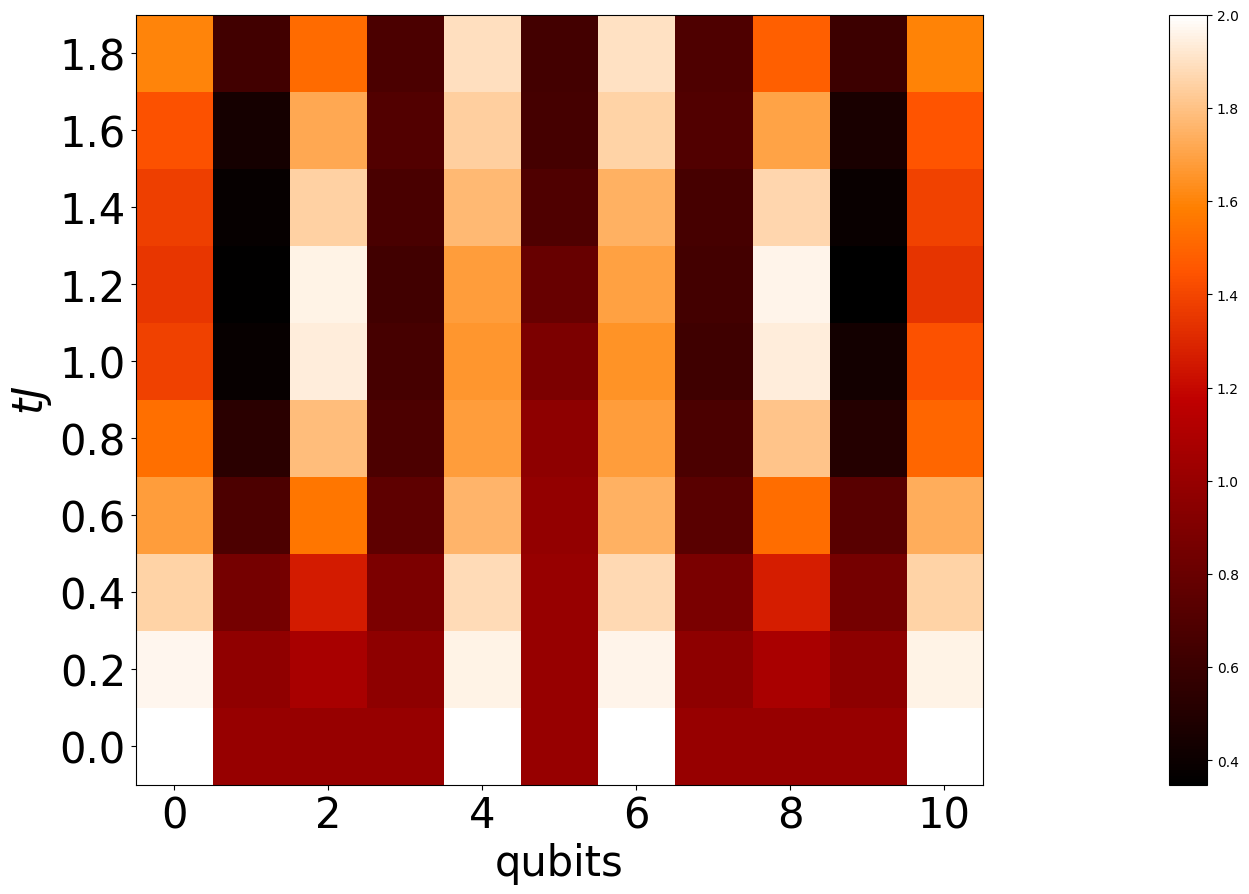

In [392]:

LabelSize=30
plt.figure(1)
plt.figure(figsize=(30,10))
plt.imshow(sim_evs_combined, interpolation='none',origin='lower',cmap = cmap)

y=Trotter_time *1
plt.yticks(range(len(y)), np.round(y,2))
plt.xlabel('qubits',fontsize=LabelSize)
plt.ylabel(r'$tJ$',fontsize=LabelSize)
plt.tick_params(axis='both', which='major', labelsize=LabelSize)
plt.colorbar(fraction=0.03, pad=0.08)
#plt.savefig(name+".png", dpi=100,bbox_inches='tight')
